In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print type(mnist.train.images), mnist.train.images.shape
print type(mnist.train.labels), mnist.train.labels.shape

<type 'numpy.ndarray'> (55000, 784)
<type 'numpy.ndarray'> (55000, 10)


[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


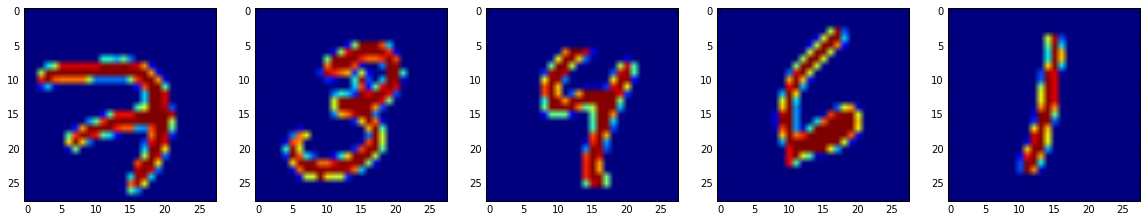

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    img = np.array(mnist.train.images[i])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)

for i in range(5):
    print mnist.train.labels[i]   

In [7]:
batch_images, batch_labels = mnist.train.next_batch(5)
print batch_images.shape
print batch_images
print

print batch_labels.shape
print batch_labels

(5, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

(5, 10)
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [8]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
print "x -", x.get_shape()

x - (?, 784)


In [10]:
y = tf.placeholder(tf.float32, [None, 10])
print "y -", y.get_shape()

y - (?, 10)


In [11]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print "W -", W.get_shape()
print "b -", b.get_shape()

u = tf.matmul(x, W) + b
print "u -", u.get_shape()

W - (784, 10)
b - (10,)
u - (?, 10)


In [12]:
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(u, y))
total_loss = tf.train.GradientDescentOptimizer(0.5).minimize(error)

In [13]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
for i in range(total_batch):
    batch_images, batch_labels = mnist.train.next_batch(batch_size)
    sess.run(total_loss, feed_dict={x: batch_images, y: batch_labels})

[1 5 5 ..., 4 6 1]
[1 5 6 ..., 9 6 1]
0.9084
916
Error Index: 2, Prediction: 5, Ground Truth: 6
Error Index: 6, Prediction: 8, Ground Truth: 2
Error Index: 7, Prediction: 9, Ground Truth: 5
Error Index: 8, Prediction: 1, Ground Truth: 8
Error Index: 27, Prediction: 4, Ground Truth: 6


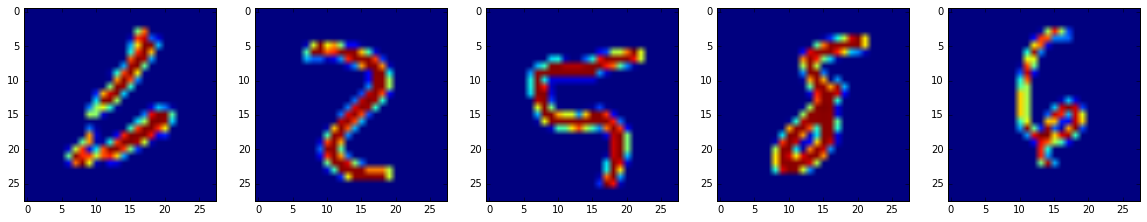

In [15]:
batch_x, batch_y = mnist.test.next_batch(10000)
prediction = sess.run(tf.argmax(u, 1), feed_dict={x:batch_x})
ground_truth = sess.run(tf.argmax(y, 1), feed_dict={y:batch_y})

print prediction
print ground_truth

sum = 0
diff_index_list = []
for i in range(10000):
    if (prediction[i] == ground_truth[i]):
        sum = sum + 1
    else:
        diff_index_list.append(i)
        #print "%d - %d: %s" % (diff_a[i], diff_b[i], diff_a[i] == diff_b[i])

print sum / 10000.0
print len(diff_index_list)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    j = diff_index_list[i]
    print "Error Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j])
    img = np.array(mnist.test.images[j])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)